In [40]:
import pandas as pd
import numpy as np
import fundamentalanalysis as fa

%matplotlib inline
import matplotlib.pyplot as plt


#ExportCharts
from PIL import Image
import glob
import os



ticker = "MSFT"
api_key = "f1ae8ba37c1321bd179bbe33dbddc3ef"


# FUNCTIONS  

In [2]:

def ExportCharts():
    images = glob.glob("IMG\*.png")
    print(images)
    imlist = []
    for img in images:
        im = Image.open(img)
        im = im.convert('RGB')
        imlist.append(im)
    imlist[0].save('{} plots.pdf'.format(ticker)  ,save_all=True, append_images=imlist[1:]) # TKR to filename on save
    map(os.remove(img),[img for img in images])

# FA · Key Metrics Annually


* BVPS
* ROIC  
* ROE

In [3]:
key_metrics = fa.key_metrics(ticker, api_key, period="annual",  limit = 12)
key_metrics

,2022,2021,2020,2019,2018
period,FY,FY,FY,FY,FY
revenuePerShare,26.450107,22.272161,18.793035,16.400756,14.332468
netIncomePerShare,9.703575,8.11859,5.818791,5.114036,2.152078
operatingCashFlowPerShare,11.877668,10.168279,7.973062,6.801121,5.699221
freeCashFlowPerShare,8.691169,7.435802,5.944021,4.986316,4.188571
cashPerShare,13.973986,17.269644,17.940473,17.440245,17.372468
bookValuePerShare,22.217449,18.813833,15.545861,13.336374,10.742597
tangibleBookValuePerShare,11.702241,11.193454,8.924442,6.849212,5.062597
shareholdersEquityPerShare,22.217449,18.813833,15.545861,13.336374,10.742597
interestDebtPerShare,8.448906,9.291242,9.670039,10.563274,10.979351


In [4]:
key_metrics_TTM = fa.key_metrics(ticker, api_key, TTM=True,  limit = 12)
key_metrics_TTM

revenuePerShareTTM                           2.723280e+01
netIncomePerShareTTM                         9.358857e+00
operatingCashFlowPerShareTTM                 1.175982e+01
freeCashFlowPerShareTTM                      8.493228e+00
cashPerShareTTM                              1.438165e+01
bookValuePerShareTTM                         2.327558e+01
tangibleBookValuePerShareTTM                 1.277980e+01
shareholdersEquityPerShareTTM                2.327558e+01
interestDebtPerShareTTM                      8.355371e+00
marketCapTTM                                 1.830097e+12
enterpriseValueTTM                           1.867495e+12
peRatioTTM                                   2.642000e+01
priceToSalesRatioTTM                         9.011926e+00
pocfratioTTM                                 2.086936e+01
pfcfRatioTTM                                 2.889596e+01
pbRatioTTM                                   1.054410e+01
ptbRatioTTM                                  1.054410e+01
evToSalesTTM  

### ROE

In [5]:
# 5yr
ROE_5yr = key_metrics.loc['roe'].iloc[::-1] # reverse date
ROE_5yr = ROE_5yr * 100
ROE_5yr

2018    20.033125
2019    38.346526
2020    37.429842
2021    43.152238
2022    43.675469
Name: roe, dtype: object

In [6]:
# ROE mean
ROE_mean = ROE_5yr.mean()
ROE_mean = ROE_mean.round(2)
ROE_mean 

36.53

In [7]:
# ROE Current
ROE_current = float(key_metrics.loc['roe'].iloc[0] * 100)
ROE_current = ROE_current.__round__(2)
ROE_current

43.68

In [8]:
# ROE TTM
ROE_ttm = key_metrics_TTM.loc['roeTTM'] * 100
ROE_ttm = ROE_ttm.round(2)
ROE_ttm

42.1

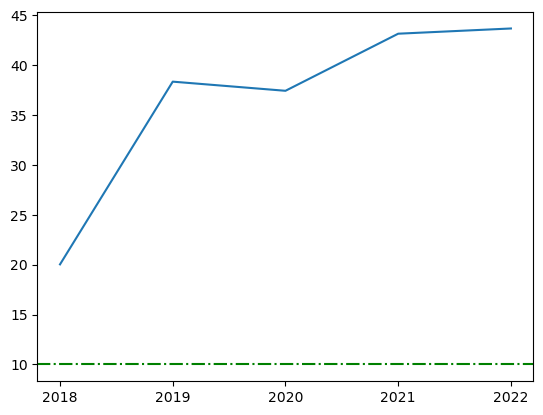

In [9]:
plt.plot(ROE_5yr)
plt.axhline(y=10, color='g', linestyle='-.')

In [10]:
df_ROE = pd.DataFrame([[ROE_current ,ROE_ttm, ROE_mean]],columns=['Now','ttm','5 yr avg'])

df_ROE

,Now,ttm,5 yr avg
0,43.68,42.1,36.53


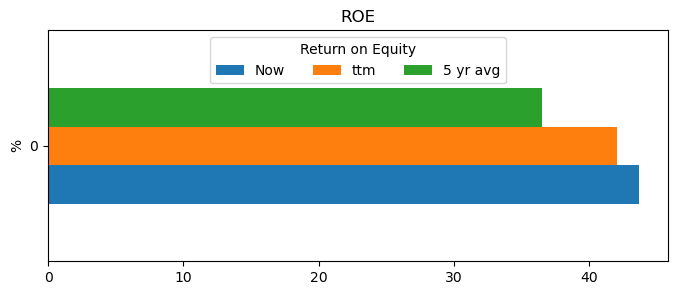

In [11]:
df_ROE.plot(figsize=(8,3), kind='barh',  title='ROE', ylabel='%').legend(
    loc='upper center', ncol=3, title="Return on Equity")


### BVPS

In [12]:
BVPS_2022 = key_metrics.loc['bookValuePerShare', '2022'] 
BVPS_2022

22.217449306296693

###     ROIC

In [13]:
# ROIC 2022 
key_metrics.loc['roic', '2022']
roic_current = key_metrics.loc['roic', '2022'] 
round(roic_current * 100, 2)


30.91

In [14]:
# ROIC 10 YR
roic_10yr = key_metrics.loc['roic']*100

roic_10yr =  roic_10yr.iloc[::-1] # reverse date
roic_10yr.head(10)

2018    17.497504
2019    19.784375
2020      23.1261
2021     28.52294
2022    30.910297
Name: roic, dtype: object

In [15]:
# ROIC 10 YR AVERAGE


In [16]:
plt.plot(roic_10yr_rev)

NameError: name 'roic_10yr_rev' is not defined

In [ ]:
round(roic_10yr.mean(), 2)   # average

In [ ]:

print(roic_10yr_rev.pct_change())

# FA ·   Financial RATIOS Annually  
https://site.financialmodelingprep.com/developer/docs/#Company-Financial-Ratios


* PE :  price / (netIncome / shareNumber)
*


In [ ]:
# ratios_annually = fa.ratios
financial_ratios = fa.ratios.financial_ratios(ticker, api_key)
type(financial_ratios)
financial_ratios

In [ ]:
# PE
priceEarningsRatio = financial_ratios.loc['priceEarningsRatio']
type(priceEarningsRatio)
priceEarningsRatio = priceEarningsRatio.iloc[::-1] # reverse date


In [ ]:
priceEarningsRatio.plot( title='PE Ratio')

In [ ]:
# PE current
priceEarningsRatio_current = financial_ratios.loc['priceEarningsRatio'].head(1)  # pull from dataframe
type(priceEarningsRatio_current)
PE = priceEarningsRatio_current[0]
PE = round(PE,2)
PE


# FA · GROWTH       
https://site.financialmodelingprep.com/developer/docs/financial-statements-growth-api/

Financial Statements Growth
* CAGR
* BVPS 
* EPS growth
* Operating Cash Flow Growth
* Free Cash Flow Growth
* Revenue Growth


In [17]:
growth_all = fa.financial_statement_growth(ticker, api_key, period="annual") 
growth_all


,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,1995,1994,1993,1992,1991,1990,1989,1988,1987,1986
period,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,...,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY
revenueGrowth,0.179561,0.175317,0.136456,0.140295,0.226904,0.054266,-0.088267,0.077701,0.115403,0.055966,...,0.277049,0.238742,0.360423,0.496528,0.557715,0.472806,0.36002,0.708008,0.751392,0.0
grossProfitGrowth,0.170591,0.195168,0.168859,0.151735,0.29302,0.059935,-0.132173,0.010735,0.039913,0.025039,...,0.292505,0.260471,0.360309,0.544777,0.593245,0.566961,0.35898,0.640916,0.721675,0.0
ebitgrowth,0.192617,0.320191,0.23278,0.225369,0.570277,0.106233,0.111282,-0.345762,0.037177,0.229794,...,0.180765,0.301659,0.331325,0.532779,0.652594,0.623452,0.292423,0.476753,1.083744,0.0
operatingIncomeGrowth,0.192617,0.320191,0.23278,0.225369,0.570277,0.106233,0.111282,-0.345762,0.037177,0.229794,...,0.180765,0.301659,0.331325,0.532779,0.652594,0.623452,0.292423,0.476753,1.083744,0.0
netIncomeGrowth,0.187152,0.383686,0.128466,1.367992,-0.218497,0.262293,0.377676,-0.447631,0.009651,0.287725,...,0.267888,0.202518,0.345855,0.530365,0.657235,0.637537,0.37611,0.723227,0.829517,0.0
epsgrowth,0.194581,0.395189,0.138943,1.376744,-0.215328,0.292453,0.422819,-0.43985,0.019157,0.292079,...,0.234043,0.175,0.25,0.454545,0.571429,0.4,0.25,1.0,0.868295,0.0
epsdilutedGrowth,0.198758,0.397569,0.13834,1.375587,-0.214022,0.290476,0.418919,-0.437262,0.01938,0.29,...,0.234043,0.175,0.25,0.454545,0.571429,0.4,0.25,1.0,0.868295,0.0
weightedAverageSharesGrowth,-0.006758,-0.008279,-0.008211,-0.003506,-0.005939,-0.022587,-0.030818,-0.014701,-0.009075,-0.002501,...,0.027869,0.024134,0.076684,0.052126,0.054604,0.169669,0.100888,-0.138387,-0.020756,0.0
weightedAverageSharesDilutedGrowth,-0.008938,-0.009762,-0.009029,-0.00526,-0.004852,-0.022588,-0.029198,-0.017264,-0.008383,-0.004232,...,0.027869,0.024134,0.076684,0.052126,0.054604,0.169669,0.100888,-0.138387,-0.020756,0.0


 CAGR    

In [31]:

head = 10
revenueGrowth = pd.DataFrame( growth_all.loc['revenueGrowth'].head(head).iloc[::-1] ) # reverse date
revenueGrowth *= 100
revenueGrowthCagrMin = revenueGrowth.min()
revenueGrowthCagrMax = revenueGrowth.max()
print(revenueGrowthCagrMin, revenueGrowthCagrMax)

cagrRev = np.power

revenueGrowth   -8.826672
dtype: object revenueGrowth    22.690384
dtype: object


Book Value per Share Growth	

In [ ]:
BVPS_growth = growth_all.loc['bookValueperShareGrowth'].head(10).iloc[::-1] # reverse date
BVPS_growth = BVPS_growth*100
BVPS_growth

In [ ]:
plt.plot(BVPS_growth)
plt.title('BVPS Growth 10yrs')

GROWTH EPS

In [ ]:
growth_EPS = growth_all.loc['epsgrowth']
growth_EPS_10yr = growth_EPS.head(10)*100
# round(growth_EPS_5yr,2)
growth_EPS_10yr = growth_EPS_10yr.iloc[::-1] # reverse date
growth_EPS_10yr

In [ ]:

round(growth_EPS.mean(),2)*100

In [ ]:
# growth_EPS_5yr_Rev = growth_EPS_5yr.iloc[::-1] # reverse date
plt.plot(growth_EPS_10yr)
plt.axhline(y=10, color='g', linestyle='-.')

### OPERATING CASH FLOW GROWTH

In [ ]:
operatingCashFlowGrowth_5yr = growth_all.loc['operatingCashFlowGrowth'].head()*100
# OCFGrowth = round(operatingCashFlowGrowth_5yr,2)
operatingCashFlowGrowth_5yr

In [ ]:
operatingCashFlowGrowth_5yr_Rev = operatingCashFlowGrowth_5yr .iloc[::-1] # reverse date
plt.plot(operatingCashFlowGrowth_5yr_Rev)

### Free Cash Flow Growth

In [ ]:
freeCashFlowGrowth_10yr = growth_all.loc['freeCashFlowGrowth'].head(10)*100
freeCashFlowGrowth_10yr

In [ ]:
freeCashFlowGrowth_10yr_Rev = freeCashFlowGrowth_10yr.iloc[::-1] # reverse date
plt.plot(freeCashFlowGrowth_10yr_Rev)
plt.title('FCF Growth %')

### Revenue Growth   
revenueGrowth

In [ ]:
revenueGrowth = growth_all.loc['revenueGrowth'].head(10)*100
revenueGrowth
revenueGrowth = revenueGrowth.iloc[::-1] # reverse date
plt.plot(revenueGrowth)
plt.title('Revenue Growth %')
plt.axhline(y=10, color='g', linestyle='-.')    #   Horizontal Line

In [124]:
abc = 5.6 **10
abc

30330548.909611396

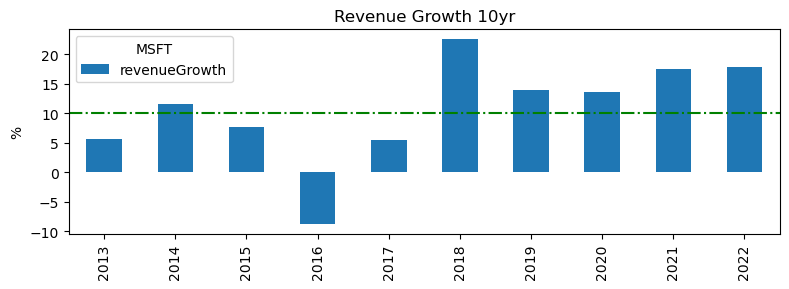

In [115]:
revenueGrowth.plot(figsize=(8,3), kind='bar',  title='Revenue Growth 10yr', ylabel='%').legend(
    loc='upper left', ncol=3, title=ticker,  )
plt.axhline(y=10, color='g', linestyle='-.')    #   Horizontal Line
plt.savefig('IMG\\revenueGrowth.png') # prep for export


### Operating Income Growth   
operatingIncomeGrowth

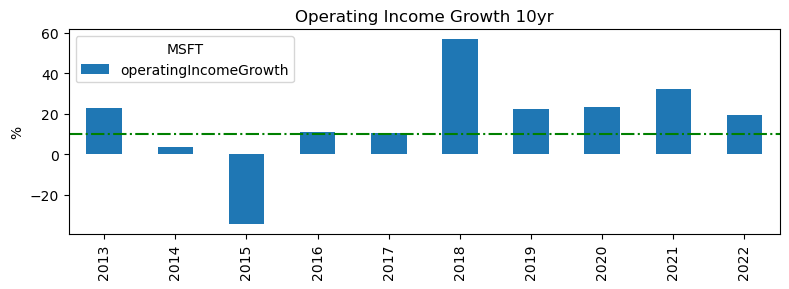

In [116]:
operatingIncomeGrowth = growth_all.loc['operatingIncomeGrowth'].head(10)*100
operatingIncomeGrowth
operatingIncomeGrowth = operatingIncomeGrowth.iloc[::-1] # reverse date

operatingIncomeGrowth.plot(figsize=(8,3), kind='bar',  title='Operating Income Growth 10yr', ylabel='%').legend(
    loc='upper left', ncol=3, title=ticker,  )
plt.axhline(y=10, color='g', linestyle='-.')    #   Horizontal Line
plt.savefig('IMG\operatingIncomeGrowth.png') # prep for export


In [121]:
ExportCharts()

['IMG\\imagename01.png', 'IMG\\operatingIncomeGrowth.png']


### Company Financial Statements  
https://site.financialmodelingprep.com/developer/docs/#Company-Financial-Statements  

* Annual income statements

In [33]:
incomeStatement = fa.income_statement(ticker, api_key, period="annual")
incomeStatement

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,1995,1994,1993,1992,1991,1990,1989,1988,1987,1986
reportedCurrency,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,...,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD
cik,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019,...,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019,0000789019
fillingDate,2022-07-28,2021-07-29,2020-07-30,2019-08-01,2018-08-03,2017-08-02,2016-07-28,2015-07-31,2014-07-31,2013-07-30,...,1995-09-25,1994-09-27,1993-06-30,1992-06-30,1991-06-30,1990-06-30,1989-06-30,1988-06-30,1987-06-30,1986-06-30
acceptedDate,2022-07-28 16:06:19,2021-07-29 16:21:55,2020-07-30 20:44:46,2019-08-01 16:09:55,2018-08-03 11:03:33,2017-08-02 16:15:01,2016-07-28 16:12:18,2015-07-31 15:07:52,2014-07-31 17:16:52,2013-07-30 16:14:49,...,1995-09-25 00:00:00,1994-09-27 00:00:00,1993-06-30,1992-06-30,1991-06-30,1990-06-30,1989-06-30,1988-06-30,1987-06-30,1986-06-30
calendarYear,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,1995,1994,1993,1992,1991,1990,1989,1988,1987,1986
period,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,...,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY
revenue,198270000000,168088000000,143015000000,125843000000,110360000000,89950000000,85320000000,93580000000,86833000000,77849000000,...,5937000000,4649000000,3753000000,2758700000,1843400000,1183400000,803500000,590800000,345900000,197500000
costOfRevenue,62650000000,52232000000,46078000000,42910000000,38353000000,34261000000,32780000000,33038000000,26934000000,20249000000,...,608000000,526000000,482000000,354100000,286800000,206400000,180000000,132000000,66300000,35100000
grossProfit,135620000000,115856000000,96937000000,82933000000,72007000000,55689000000,52540000000,60542000000,59899000000,57600000000,...,5329000000,4123000000,3271000000,2404600000,1556600000,977000000,623500000,458800000,279600000,162400000
grossProfitRatio,0.684017,0.689258,0.67781,0.65902,0.652474,0.619111,0.615799,0.646954,0.689818,0.739894,...,0.897591,0.886857,0.871569,0.871642,0.844418,0.825587,0.77598,0.776574,0.808326,0.822278


In [78]:
head = 10

In [80]:
# CAGR REVENUE  
CagrRevenue = pd.DataFrame(incomeStatement.loc['revenue'].head(head).iloc[::-1] ) # reverse date

revenueCagrFirst = CagrRevenue.iloc[0]
revenueCagrLast = CagrRevenue.iloc[-1]

cagrRevenue10yr = (revenueCagrLast - revenueCagrFirst)**(1/head)-1
cagrRevenue10yr = cagrRevenue10yr[0]
cagrRevenue10yr = round(cagrRevenue10yr, 2)

print ('{} 10 yr CAGR Revenue of {} '.format(ticker , cagrRevenue10yr))


MSFT 10 yr CAGR Revenue of 11.83 
